In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns

In [2]:


# downloading the data set

""""df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


df = df.rename(columns=column_names)

df=pd.read_csv('temperature.csv')

df.head()"""

'"df=pd.read_excel(\'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx\')\n#rename columns\ncolumn_names = {\'X1\':\'Relative_Compactness\', \'X2\': \'Surface_Area\', \n                \'X3\':  \'Wall_Area\', \'X4\': \'Roof_Area\', \'X5\': \'Overall_Height\',\n                \'X6\': \'Orientation\', \'X7\': \'Glazing_Area\', \n                \'X8\': \'Glazing_Area_Distribution\', \n                \'Y1\': \'Heating_Load\', \'Y2\': \'Cooling_Load\'}\n\n\ndf = df.rename(columns=column_names)\n\ndf=pd.read_csv(\'temperature.csv\')\n\ndf.head()'

In [3]:

df=pd.read_csv('temperature.csv')

df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


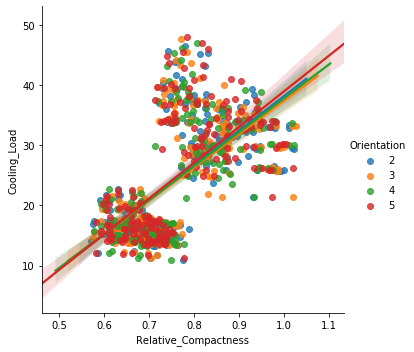

In [4]:
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
sns.lmplot(x='Relative_Compactness',y='Cooling_Load',x_jitter=.05,hue='Orientation',data=df)

Visualization

In [5]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


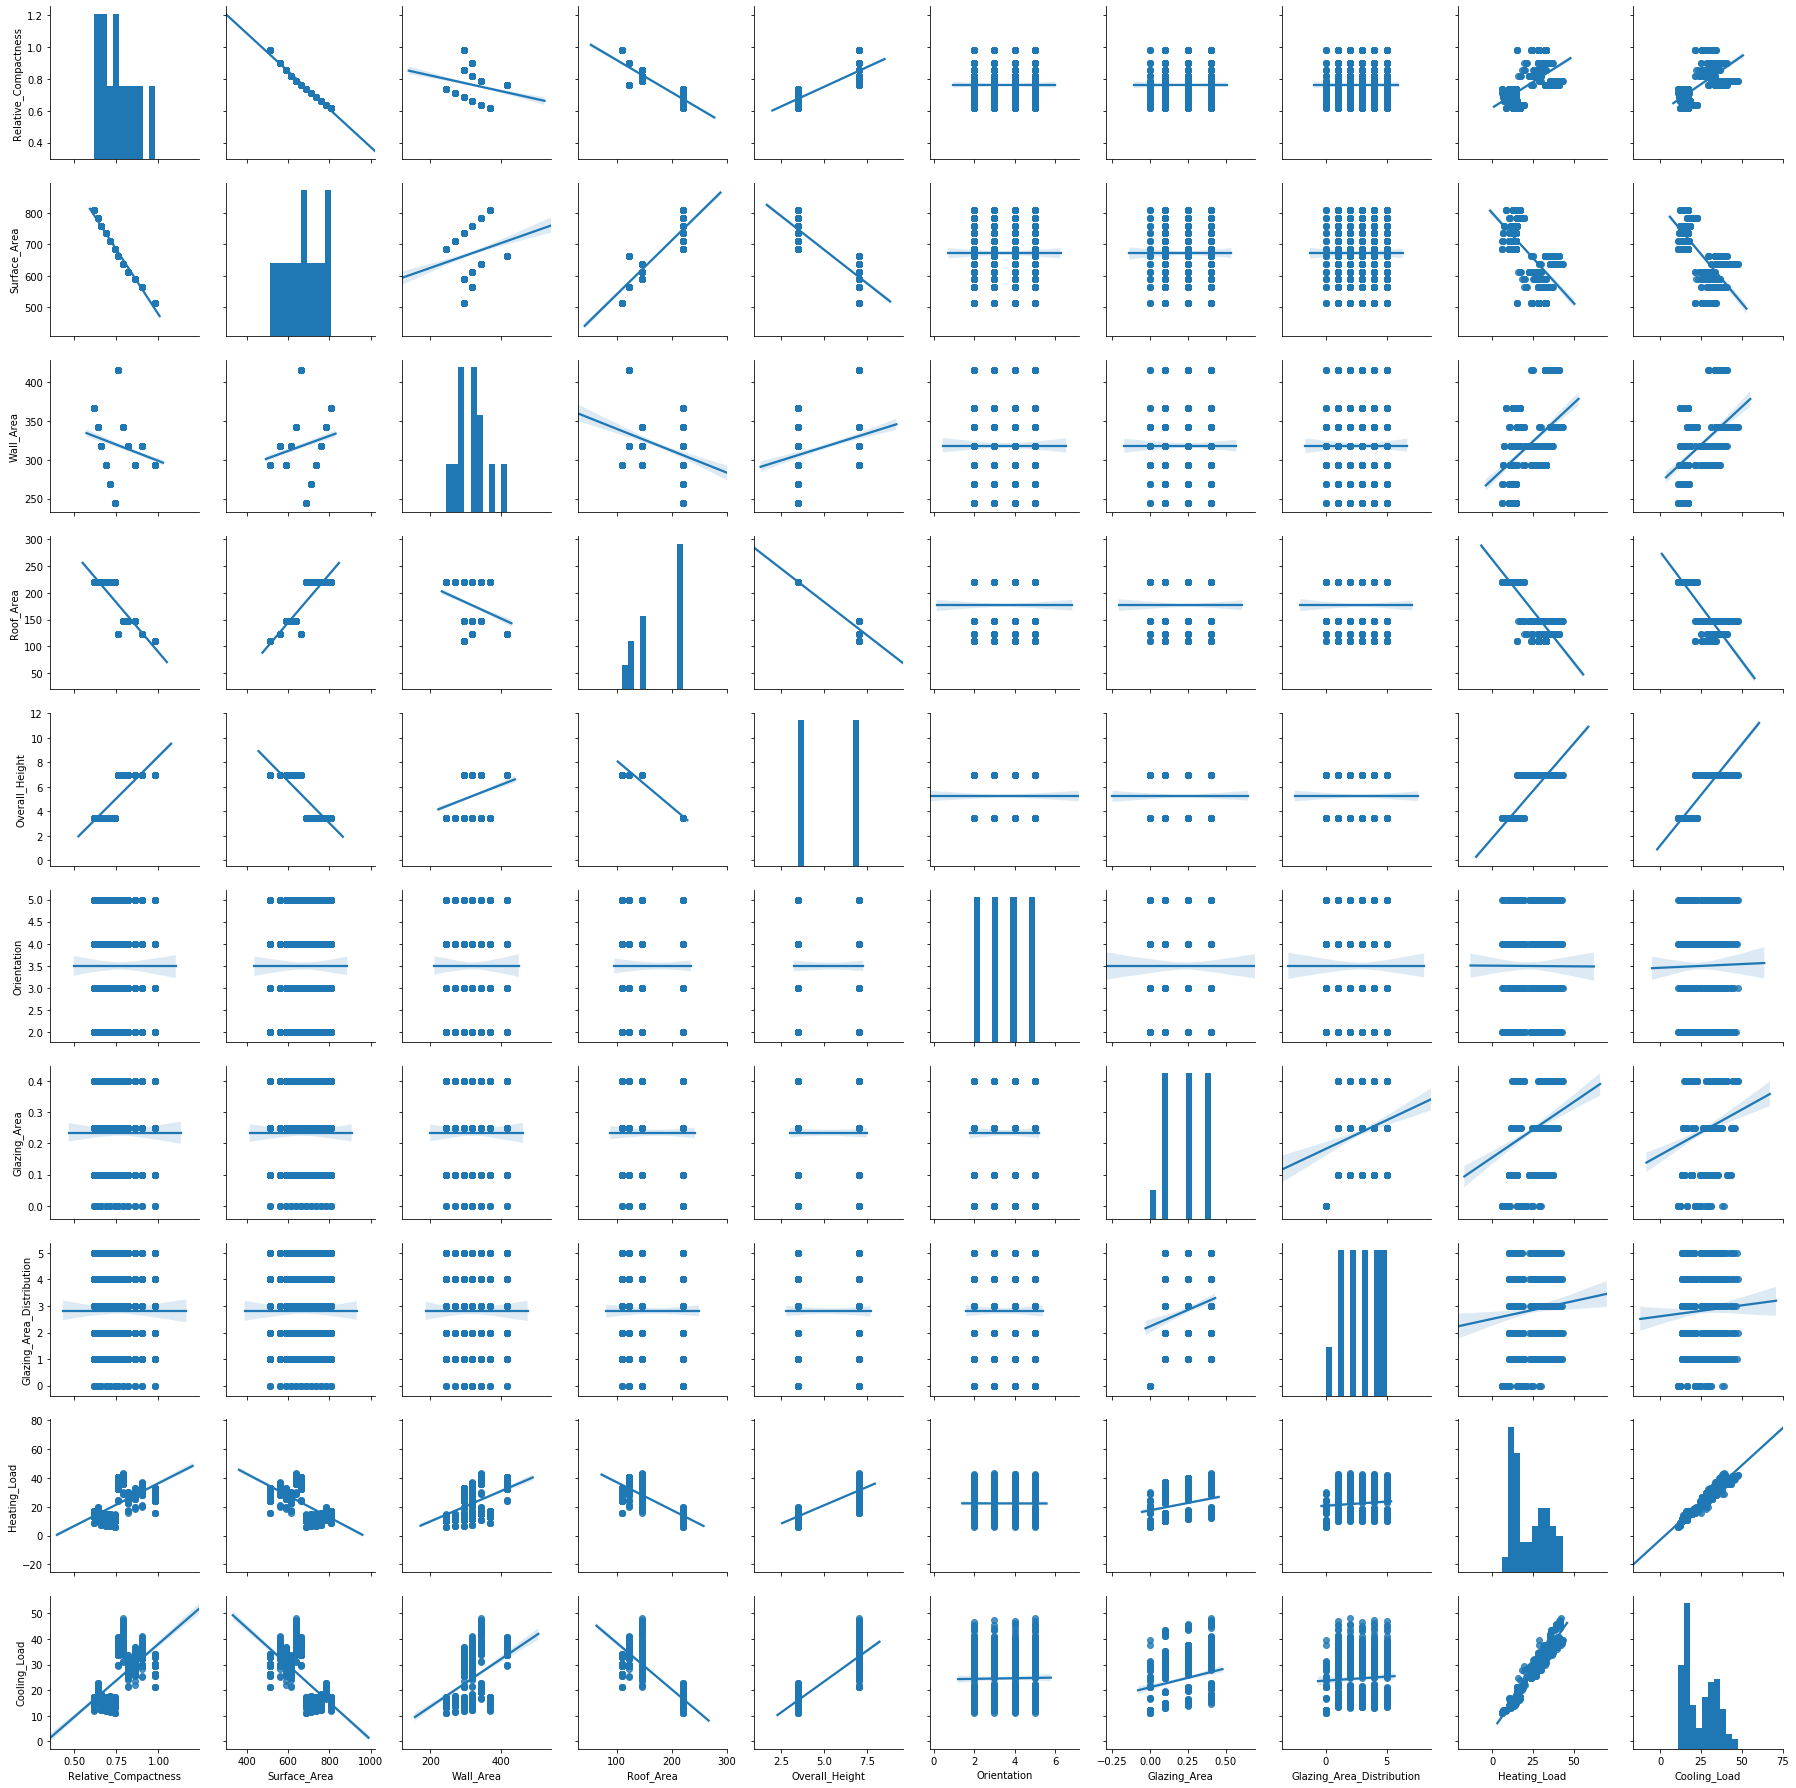

In [6]:
# to get the correlation between each variable in the data set
sns.pairplot(df,kind='reg')

In [7]:
#confirming correlation
df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing_Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


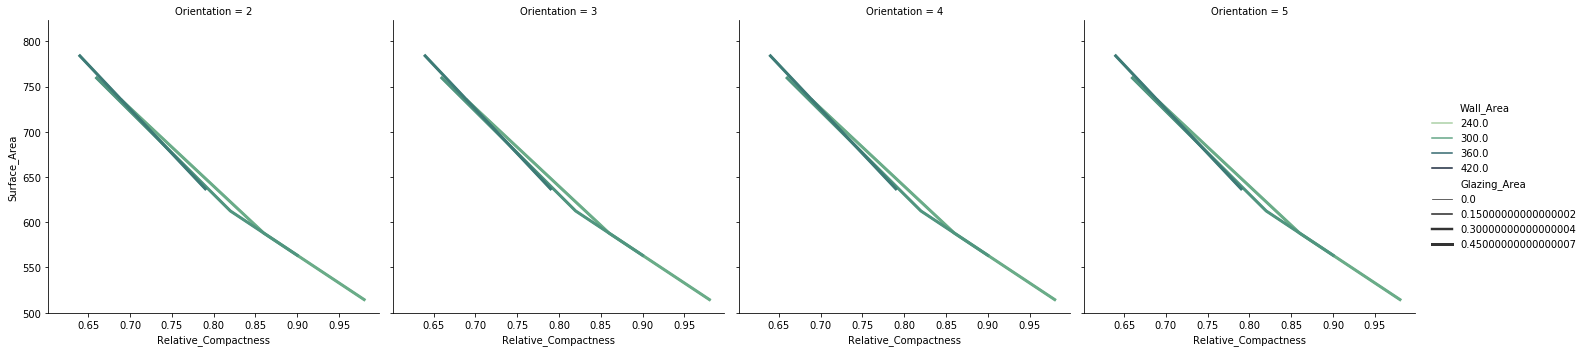

In [8]:
sns.relplot(x='Relative_Compactness',y='Surface_Area',kind='line',hue='Wall_Area',size='Glazing_Area',
            palette="ch:r=-.5,l=.75",col='Orientation',data=df)

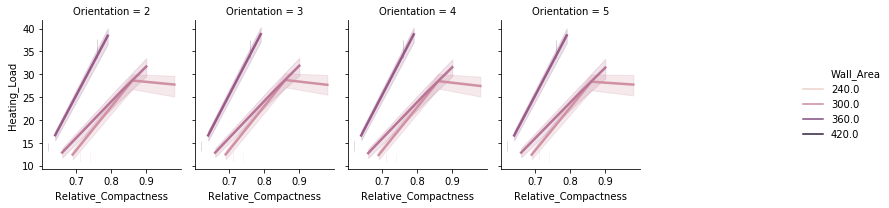

In [9]:
#Plot to determine if differnetn orientations and size of the wall area  will have a noticeable effect.
sns.relplot(x="Relative_Compactness", y="Heating_Load", hue="Wall_Area",
            col="Orientation", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df)

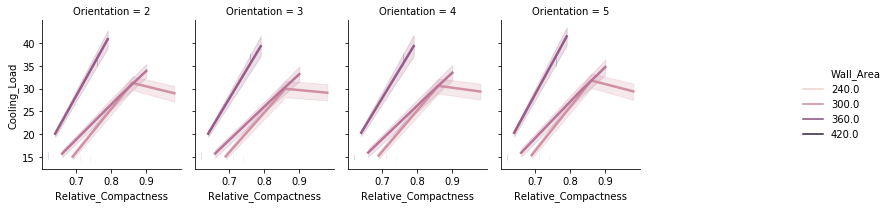

In [10]:
sns.relplot(x="Relative_Compactness", y="Cooling_Load", hue="Wall_Area",
            col="Orientation", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df)

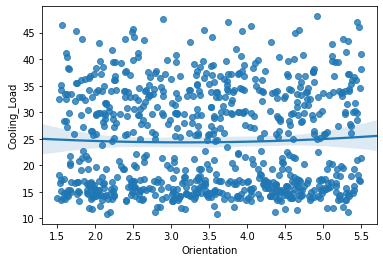

In [11]:
sns.regplot(x="Orientation", y="Cooling_Load", data=df, order=2,x_jitter=0.5)

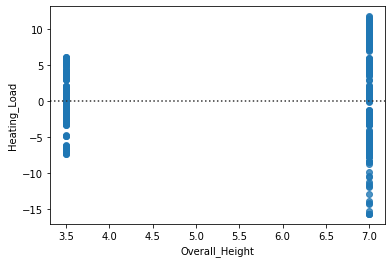

In [12]:
# using  residual plot to test if a simple linear regressin will effectively explain the relationship between overall height and heating load
sns.residplot(x='Overall_Height',y='Heating_Load',data=df)

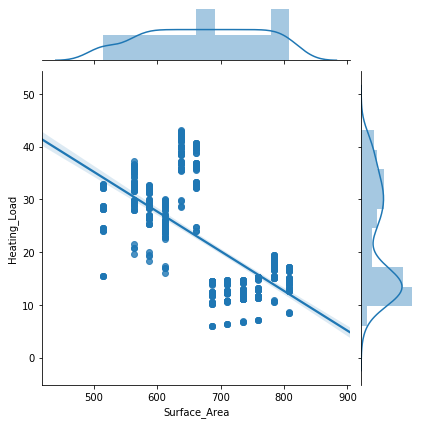

In [13]:
sns.jointplot(x='Surface_Area',y='Heating_Load',data=df, kind='reg')

In [14]:
df[['Surface_Area','Heating_Load']].corr()

,Surface_Area,Heating_Load
Surface_Area,1.00000,-0.65812
Heating_Load,-0.65812,1.00000


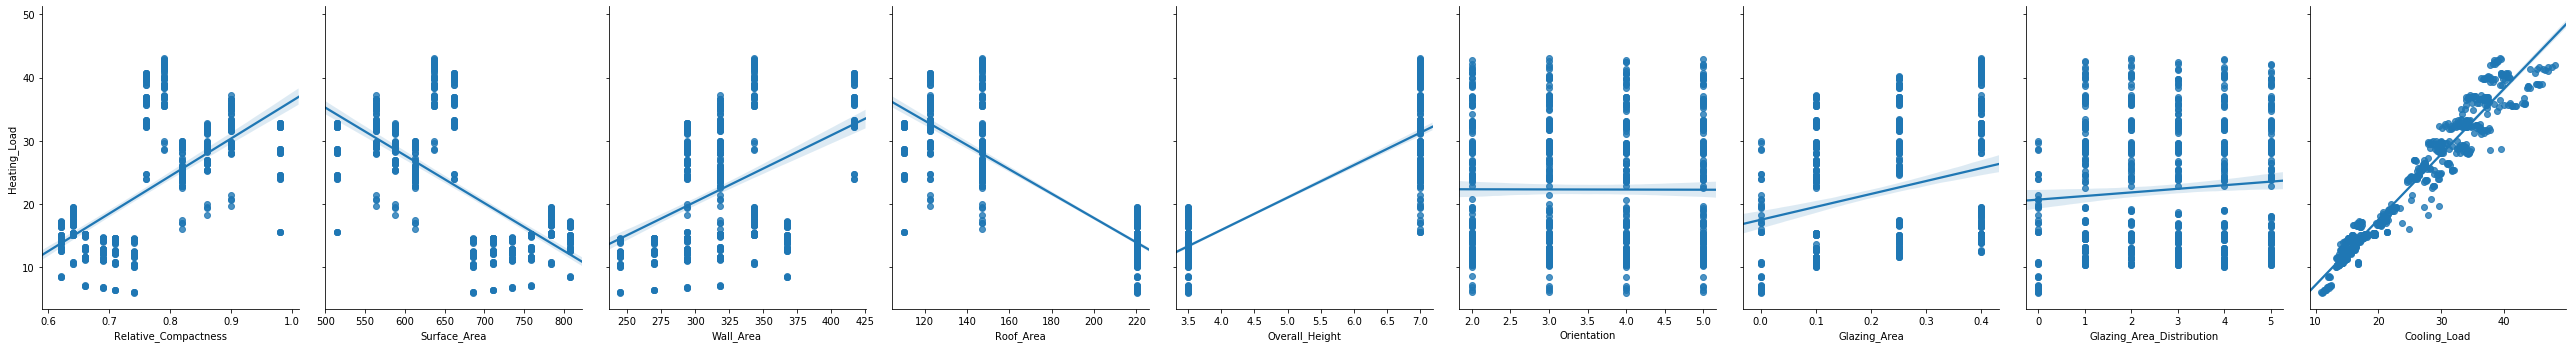

In [15]:
x=df.columns.values.tolist()
x.remove('Heating_Load')
sns.pairplot(df, x_vars=x, y_vars=["Heating_Load"],
             height=5, aspect=.8, kind="reg")

CREATING A LINEAR MODEL

In [16]:
# split the data set into dependent and independent variables
train=df.loc[:,"Relative_Compactness":"Glazing_Area_Distribution"]
test_heat=df.loc[:,'Heating_Load']

In [17]:
#scaling the data to ensure that ensure all features are withing the same range
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [18]:
#to ensure that our model does not train and test on the same data we use the train test split 
x_train,x_test,y_train,y_test=train_test_split(train,test_heat,test_size=0.3,random_state=1)
#scaling the dataset to ensure that all features are in the same  range and thus give equal weighting my the 
scaler=MinMaxScaler().fit(x_train)
x_trained_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [19]:
#using the linearregression model
lm=LinearRegression() 
lm.fit(x_trained_scaled,y_train)
lm.score(x_test_scaled,y_test)
predic_lm=lm.predict(x_test_scaled)
print('r2 score on  training set is',lm.score(x_trained_scaled,y_train))
print('r2 score on  test set is',lm.score(x_test_scaled,y_test))
print('mean absolute_error on predicted_values is : ',mean_absolute_error(y_test,predic_lm), 'and' 'r2 score is ',r2_score(y_test,predic_lm))

r2 score on  training set is 0.9252691483376907
r2 score on  test set is 0.8938550769308065
mean absolute_error on predicted_values is :  2.3354619286818505 andr2 score is  0.8938550769308063


In [20]:
# Using a ridge model 
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001)
ridge.fit(x_trained_scaled,y_train)
ridge.score(x_test_scaled,y_test)
predic_ridge=ridge.predict(x_test_scaled)
print('r2 score on  training set is',ridge.score(x_trained_scaled,y_train))
print('r2 score on  test set is',ridge.score(x_test_scaled,y_test))
print('mean absolute_error on predicted_values is : ',mean_absolute_error(y_test,predic_ridge), 'and' 'r2 score is ',r2_score(y_test,predic_ridge))

r2 score on  training set is 0.925269109528004
r2 score on  test set is 0.89385188124886
mean absolute_error on predicted_values is :  2.3355324723838966 andr2 score is  0.89385188124886


In [21]:
#using a lasso model
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001, max_iter=10000)
lasso.fit(x_trained_scaled,y_train)
lasso.score(x_test_scaled,y_test)
predic_lasso=lasso.predict(x_test_scaled)
print('r2 score on  training set is',lasso.score(x_trained_scaled,y_train))
print('r2 score on  test set is',lasso.score(x_test_scaled,y_test))
print('mean absolute_error on predicted_values is : ',mean_absolute_error(y_test,predic_lasso), 'and' 'r2 score is ',r2_score(y_test,predic_lasso))
print('number of features used= ',np.sum(lasso.coef_!=0))


r2 score on  training set is 0.9252300330268933
r2 score on  test set is 0.8937490927828348
mean absolute_error on predicted_values is :  2.337845486773256 andr2 score is  0.8937490927828348
number of features used=  7


In [22]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.column = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(lm, x_train, 'linear_model_weight')
ridge_weights_df = get_weights_df(ridge, x_train, 'ridge_weight')
#lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


C:\Users\Homet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


KeyError: 'linear_model_weight'

In [ ]:
weights=pd.Series(lm.coef_,x_trained_scaled.columns).sort_values()
weights

Grid Search
This is to implemtent a cross validation and at the same time to run different models over different parameters in other to reduce the effect of overfitting and get the best model.

We can perform a grid search on only the Ridge and Lasso model becauese they both offer methods for regulaization.

In [ ]:
# grid search cv with ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge
shuffle=ShuffleSplit(train_size=0.5,test_size=0.5,n_splits=10)
param_grid=dict(alpha=[0.1,1,0.001,0.01,10])
grid_ridge=GridSearchCV(Ridge(),param_grid,cv=shuffle)
grid_ridge.fit(x_trained_scaled,y_train)
grid_ridge.score(x_trained_scaled,y_train)
print(' score on  test set is',grid_ridge.score(x_test_scaled,y_test))
print("Best parameters: {}".format(grid_ridge.best_params_))
#this gives the mean value of all evaluated models
print("Best cross-validation score: {:.2f}".format(grid_ridge.best_score_))
predic_gridR=grid_ridge.predict(x_test_scaled)
print('mean absolute_error on predicted_values is : ',mean_absolute_error(y_test,predic_gridR), 'and' 'r2 score is ',r2_score(y_test,predic_gridR))


Using a grid search cv we can see that there is no much differnece with the simple ridge method adn this can be ascribed to the size of the dataset which is small

In [ ]:
# grid search cv with ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
shuffle=ShuffleSplit(train_size=0.5,test_size=0.5,n_splits=10)
param_grid=dict(alpha=[0.1,1,0.001,0.01,10])
grid_lasso=GridSearchCV(Lasso(max_iter=10000),param_grid,cv=shuffle)
grid_lasso.fit(x_trained_scaled,y_train)
grid_lasso.score(x_trained_scaled,y_train)
print(' score on  test set is',grid_lasso.score(x_test_scaled,y_test))
print("Best parameters: {}".format(grid_lasso.best_params_))
#this gives the mean value of all evaluated models
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))
predic_gridL=grid_ridge.predict(x_test_scaled)
print('mean absolute_error on predicted_values is : ',mean_absolute_error(y_test,predic_gridL), 'and' 'r2 score is ',r2_score(y_test,predic_gridL))


In [ ]:
grid_lasso.cv_results_